# Prediction using ethnicity classifier with a Conv Net
A classifier to identify the ethnicity of a person's face. The core of the classifier machine is a Convolutional Net. 

In [14]:
__author__ = "Joann H. Tang, PhD"
__copyright__ = "Copyright 2018"
__email__ = "eagtang2007@gmail.com"
__status__ = "Prototype"

In [15]:
import keras
import keras.utils
from keras.models import Sequential
#Core layers
from keras.layers import Dense, Dropout, Activation, Flatten
#CNN layers
from keras.layers import SeparableConv2D, Conv2D, MaxPooling2D
from keras.models import model_from_json

import numpy as np
import pandas as pd
import h5py

import io,json

from matplotlib import pyplot as plt
import cv2

#### Set the directory path

In [16]:
path = "/Users/huizhentang/Documents/Repos/Pet-projects/Ethnicity-Classifier/Datasets/"
save_path = "/Users/huizhentang/Documents/Repos/Pet-projects/Ethnicity-Classifier/"

#### Load model and weights

In [17]:
#Load json and recreate model
with open(save_path + 'model.json') as json_file:
    trained_model = model_from_json(json_file.read())

#Load weights into new model
trained_model.load_weights('model.h5')

print("Loaded trained model")

Loaded trained model


#### Prediction 

/Users/huizhentang/Documents/Repos/Pet-projects/Ethnicity-Classifier/Datasets//Asian/Pred/73*.jpg


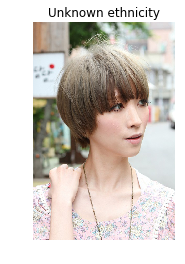

In [24]:
## # load and show image for ethnicity prediction
n = np.random.randint(1,80)
im_pred = cv2.imread(path + '/Asian/Pred/' + str(n) + '.jpg')
print(path + '/Asian/Pred/' + str(n) +'*.jpg')
RGB_im_pred = cv2.cvtColor(im_pred, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_im_pred)
plt.title('Unknown ethnicity')
plt.axis('off')
plt.show()

In [25]:
# Resize image to new size (width X height)
width = 128
height = 128
resized_im_pred = cv2.resize(RGB_im_pred, (width,height), interpolation = cv2.INTER_AREA)
arr_x = np.zeros((1,width,height,3)) 
if im_pred is not None:
    arr = np.asarray(resized_im_pred)
arr_x[0,:] = arr
arr_x = (arr_x).astype('float32')
prediction = trained_model.predict(arr_x)[0]
print('Korean-Japanese-Chinese-Indian')
print(prediction)

Korean-Japanese-Chinese-Indian
[ 0.  1.  0.  0.]
